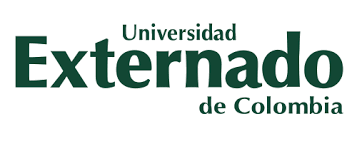

**JUAN SEBASTIAN PRIETO DUEÑAS**

**JOSE DAVID OBANDO ACOSTA**

**MARIANGEL MANTILLA**

**TALLER 2**

**FINANZAS COMPUTACIONALES**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
!pip install yfinance
import yfinance as yf
from scipy.stats import norm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


Se importan las librerias que se utilizarán

1. Escoja una acción de su preferencia. Con la información histórica para el periodo Ene-
2016 a Dic-2021, estime los parámetros μ y σ.



In [ ]:
MSFT = yf.download("MSFT",start="2016-01-01",end="2021-12-31",interval='1Mo')
MSFT = MSFT.loc[:,('Adj Close')]
MSFT

[*********************100%***********************]  1 of 1 completed


Date
2016-01-01     49.529877
2016-02-01     45.744793
2016-03-01     50.012276
2016-04-01     45.158649
2016-05-01     47.992954
                 ...    
2021-08-01    298.800751
2021-09-01    279.578522
2021-10-01    328.865753
2021-11-01    327.844299
2021-12-01    334.136932
Name: Adj Close, Length: 72, dtype: float64

Se extraen los precios de cierra ajuntados

In [ ]:
pruebaMSFT = adfuller(MSFT)
print('ADF Statistic: %f' % pruebaMSFT[0])
print('p-value: %f' % pruebaMSFT[1])
print('Critical Values:')
for key, value in pruebaMSFT[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: 4.517825
p-value: 1.000000
Critical Values:
	1%: -3.53522
	5%: -2.90715
	10%: -2.59110


se realiza una prueba de estacionalidad, y nos dice que los precios del activo no son estacionarios debido a que el valor-P es mayor a la significancia del 5%

a. Con estos parámetros construya 10.000 trayectorias del precio que sigan el proceso
estocástico:

In [ ]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    St = S 
    return St

In [ ]:
T = 1
mu = 0.05
sigma = 0.2
S0 = MSFT.iloc[-1]
NS = 10000
M = 12
St = PathsGBM(S0,mu,sigma,T,NS,M)
St

array([[334.13693237, 350.02450362, 345.34250605, ..., 369.73207359,
        361.03959508, 369.14458317],
       [334.13693237, 319.22963672, 342.71308527, ..., 306.8582772 ,
        323.55477684, 313.59670101],
       [334.13693237, 351.49977553, 375.54864774, ..., 414.29359053,
        420.68831659, 432.049713  ],
       ...,
       [334.13693237, 324.11156689, 330.71406244, ..., 311.19419177,
        294.69022821, 307.02172167],
       [334.13693237, 282.70247182, 264.08679843, ..., 271.69962893,
        269.48362896, 268.68311469],
       [334.13693237, 333.98412855, 329.31841508, ..., 360.18670185,
        367.82158827, 366.37816307]])

Acá se identifican las 10.000 trayectorias generadas

Donde: Wt es un proceso estándar de Wiener. Presente gráficamente las primeras 20
trayectorias del proceso para un tiempo de un año (T=1).

In [ ]:
def random_walk(N, T, mu=0, sigma=1):
  '''
  Args:
      T : Duration of simulation in time steps
      N : Number of random walks
      mu : mean 
      sigma : standard deviation 
  '''
  rands = np.random.normal(mu, sigma, size=(N, T))
  sim = np.cumsum(rands, axis=1)
  return sim

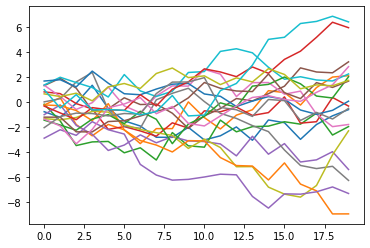

In [ ]:
sim = random_walk(20, 20,  mu=0, sigma=1)
plt.plot(np.transpose(sim));

En este caso se grafican las primeras 20 trayectorias, junto a su techo y piso, es decir, en el rango que se mueve.

b. Presente los histogramas de los precios y retornos al final del periodo (T=1).

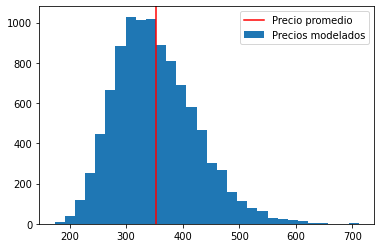

In [ ]:
plt.hist(St[:,-1], bins=30, label='Precios modelados')
plt.axvline(St[:,-1].mean(), color='r', label='Precio promedio')
plt.legend();

Acá identificamos el precio promedio esperado del activo, más los precios modeladalos que tienden a tener una distribución normal

c. Demuestre que el valor terminal del precio simulado de la acción converge a
ST exp{(μ– 1/2σ
2
)}.

In [ ]:
St[:,12].mean()

352.4204907387337

In [ ]:
S0 * np.exp(mu * T)

351.2684992355344

Acá identificamos que el valor terminal debe ser 351.2684671532866, y llegamos a 352.3514622606179, lo que quiere decir que nos falta más trayectorias para poder llegar al número terminal.

d. Calcule la probabilidad de que los retornos de la acción sean inferiores a cero.

In [ ]:
retornos=np.log(MSFT/MSFT.shift()).dropna()
retornosdatos=pd.DataFrame(retornos)
S01=retornosdatos.iloc[-1]
prob=S01<0
prob.value_counts()/NS

False    0.0001
Name: 2021-12-01 00:00:00, dtype: float64

Se evidencia que solo el 0.01% de los retornos son mayores que 0

2. Con las acciones de: JPM, MCD, META, WMT

In [ ]:
activos = ["JPM", "MCD","META","WMT"]
precios = yf.download(activos,start="2015-12-01",end="2021-12-31",interval='1Mo')
precios = precios.loc[:,"Adj Close"]
precios.head(20)
retornos=np.log(precios/precios.shift()).dropna()
mu=retornos.mean()#desde aca simulado
sigma=retornos.std()
cov=retornos.cov()
n=len(mu)

[*********************100%***********************]  4 of 4 completed


Se construyen los retornos de las acciones, con sus respectivos parametros

a. Construir el portafolio de mínima varianza global de Markowitz. Presentar el grafico de
pesos y sus medidas de retorno esperado y volatilidad

In [ ]:
#PMVG
import cvxpy as cp
w= cp.Variable(n)
risk= cp.quad_form(w,cov)
objeective= cp.Minimize(risk)
constraints=[cp.sum(w)==1,w>=0]
optim=cp.Problem(objeective,constraints)
optim.solve()
wpmvg=w.value
ret_port=retornos@wpmvg

Se realiza el portafolio de Minima Varianza Global

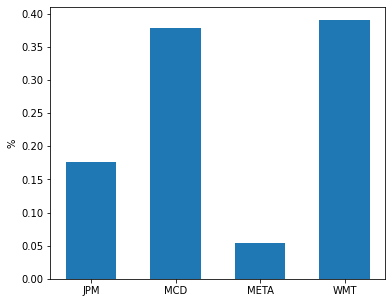

In [ ]:
figura=plt.figure(figsize=(6,5))
plt.bar(activos,wpmvg,width=0.6)
plt.ylabel("%")
plt.show()

In [ ]:
wpmvg

array([0.17592584, 0.37893343, 0.05447244, 0.39066829])

Además, se grafica su porcentaje de pesos que se debe invertir en cada acción para obtener un portafolio con el menor sigma, y se puede ver que la suma de ellos no supera 1

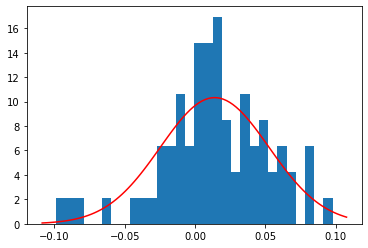

In [ ]:
rp=ret_port.mean()
sigmp=ret_port.std()
rp,sigmp
plt.hist(ret_port,bins=30,density=True)
xmin,xmax=plt.xlim()
r=np.linspace(xmin,xmax,100)
ptr=norm.pdf(r,rp,sigmp)
plt.plot(r,ptr,"r");

En este grafico se identifica los retornos como su sigma, del portafolio, y se puede ver que se busca una distribución normal, pero hay un exceso de curtosis y de sesgo en la cola izquierda. 

b. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo
estándar o paramétrico

In [ ]:
alpha = 0.01
VaRp = rp - norm.ppf(1-alpha)*sigmp
rp, sigmp, VaRp

(0.013925494307525503, 0.03864382752256483, -0.07597349169439412)

In [ ]:
alpha = 0.05
VaRp = rp - norm.ppf(1-alpha)*sigmp
rp, sigmp, VaRp

(0.013925494307525503, 0.03864382752256483, -0.049637945552252385)

Para un alpha del 1%, hay una maxima perdida potencial esperada del -0.0759735, y para un alpha del 5% su maxima perdida potencial esperada es  -0.049637. Esto, con un VaR paramétrico

c. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo
de estimación histórica

In [ ]:
varh=np.percentile(ret_port,1)#99% de confianza
varh

-0.09264313094817389

In [ ]:
varh=np.percentile(ret_port,5)#95% de confianza
varh

-0.05164270203677861

Para un alpha del 1%, hay una maxima perdida potencial esperada del -0.092643, y para un alpha del 5% su maxima perdida potencial esperada es  -0.05165688. Esto, con un VaR de estimación histórica

d. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo
de simulación

In [ ]:
T=1
mu = rp
sigma = sigmp
S0 = rp
NS = 10000 
M = 12 
St1 = PathsGBM(S0,mu,sigma,T,NS,M)
Rets=St1.mean()

In [ ]:
alpha = 0.05
VaRp = Rets - norm.ppf(1-alpha)*sigmp
VaRp

-0.04954347956880636

In [ ]:
alpha = 0.01
VaRp = Rets - norm.ppf(1-alpha)*sigmp
VaRp

-0.0758790257109481

Para un alpha del 1%, hay una maxima perdida potencial esperada del -0.075879, y para un alpha del 5% su maxima perdida potencial esperada es -0.0495434. Esto, con un VaR de estimación histórica

3. Con la información de los registros de pérdidas de la entidad TuDeuda Ltda:

a. Realizar un análisis exploratorio de los datos (media, desviación, curtosis, simetría).
Apoye su análisis con gráficos (histogramas y QQplot).

In [ ]:
data_tudeuda =pd.read_excel("/content/sample_data/DataLoss.xlsx")
data_tudeuda.head()

,Date,Loss
0,2001-01-01,18986
1,2001-02-01,7312
2,2001-03-01,581
3,2001-04-01,4995
4,2001-05-01,10808


In [ ]:
#Simetria
data_tudeuda.skew()
#La cola se estira a la derecha

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Loss    0.00489
dtype: float64

In [ ]:
#Curtosis
data_tudeuda.kurt()
#Si los datos están muy dispersos, la distribución es platicúrtica (curtosis menor a 0).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Loss   -1.076109
dtype: float64

In [ ]:
#Desviacion
data_tudeuda.std()
#

Date    2218 days 14:41:50.841086496
Loss                     5591.237909
dtype: object

In [ ]:
#Media
data_tudeuda.mean()
#La media es de 9983

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


Loss    9983.123016
dtype: float64

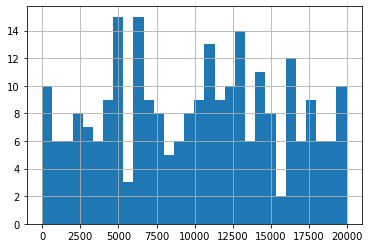

In [ ]:
data_tudeuda["Loss"].hist(bins=30)

#El histogram muestra que no hay una distribucion normal

b. ¿Qué puede decir de la distribución de los datos de pérdidas de la entidad?

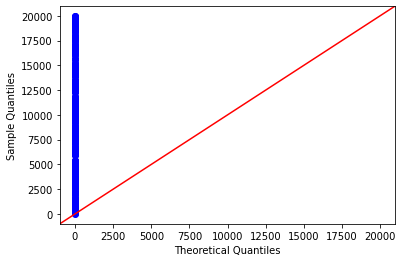

In [ ]:
fig = sm.qqplot(data_tudeuda["Loss"], line='45')
plt.show()
#Los datos no siguen la linea de 45 grados es decir no se distribuyen normal

tomando en cuenta el histograma antes visto y el grafico QQ se puede intuir que la distrubucion no es normal , ya que los datos no siguen a le linea
sumado a esto se puede decir que gracias a los calculos de simetria y curtosis tambien se puede afrimar que no cumple con la distribucion normal

c. Ajuste diferentes funciones de distribución de probabilidad a los datos. ¿Qué distribución
recomienda?

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fitter: filename=fitter-1.5.1-py3-none-any.whl size=25596 sha256=2bf2030dbdb9bd123939829f28807f879a4502b1eed901bf8715a6daf56894d3
  Stored in directory: /root/.cache/pip/wheels/40/65/62/57b872ba7af36e70111b1f67cffe76f97c747804aff7665ccb
Successfully built fitter


Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.94it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,1.041032e-07,1984.136725,-5433.983819,inf,0.040650,0.783563
powerlaw,1.042813e-07,1986.631183,-5428.023707,inf,0.045614,0.653649
rayleigh,1.240635e-07,2014.631369,-5389.780341,inf,0.083929,0.054174
norm,1.255499e-07,2019.622890,-5386.779128,inf,0.068681,0.177082
gamma,1.255533e-07,2021.622999,-5381.242834,inf,0.068493,0.179411


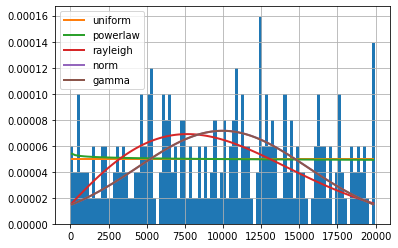

In [ ]:
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions
fa = Fitter(data_tudeuda["Loss"], distributions= get_common_distributions())
fa.fit()
fa.summary()

Nos damos cuenta que la mejor funcion es la uniforme ya que tiene el chi cuadrado menor , ademas tiene el menor aic lo que demuestra que es el mejor modelo de los anteriores , ademas de tener el bic mas negativo , y el ks es mayor al de las distrubucciones

d. Si la frecuencia de los eventos de perdidas sigue una distribución Binomial con parámetros
N=12 y p=0.2, calcule la perdida esperada.

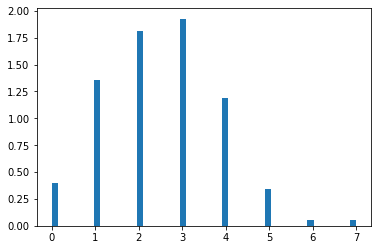

In [ ]:
from scipy.stats import binom 
import matplotlib.pyplot as plt 
n = 12
p = 0.2
simulations= len(data_tudeuda["Loss"])
ma= np.random.binomial (n , p , simulations)
plt.hist(ma,density=True , bins= 50)
plt.show()


In [ ]:
ma

array([2, 2, 2, 2, 4, 3, 4, 1, 0, 3, 3, 3, 4, 3, 3, 3, 3, 3, 1, 3, 1, 1,
       3, 0, 3, 2, 4, 1, 0, 2, 2, 2, 1, 1, 3, 2, 4, 3, 1, 3, 2, 3, 0, 1,
       2, 4, 1, 3, 3, 0, 3, 4, 2, 2, 2, 3, 0, 4, 1, 4, 3, 4, 3, 2, 2, 3,
       4, 3, 2, 3, 4, 1, 1, 3, 3, 0, 4, 2, 3, 1, 2, 3, 3, 1, 2, 2, 1, 0,
       2, 0, 3, 6, 2, 3, 3, 5, 0, 3, 4, 2, 3, 4, 1, 3, 3, 4, 2, 2, 3, 1,
       3, 3, 4, 4, 3, 3, 1, 2, 3, 2, 4, 4, 1, 4, 1, 3, 1, 2, 3, 5, 1, 0,
       4, 2, 3, 1, 1, 2, 1, 1, 3, 4, 3, 2, 2, 4, 2, 1, 4, 1, 6, 1, 3, 3,
       4, 3, 3, 1, 1, 1, 1, 2, 0, 7, 2, 4, 3, 3, 3, 0, 3, 4, 2, 2, 2, 0,
       2, 3, 0, 3, 2, 0, 2, 2, 4, 4, 2, 3, 1, 7, 1, 2, 1, 5, 4, 1, 0, 2,
       5, 3, 2, 1, 2, 4, 3, 3, 1, 1, 3, 3, 3, 2, 0, 1, 1, 2, 3, 2, 2, 2,
       2, 1, 4, 4, 4, 3, 0, 4, 3, 1, 2, 3, 2, 3, 0, 0, 2, 2, 5, 5, 1, 2,
       3, 3, 2, 2, 0, 5, 4, 3, 3, 0])

In [ ]:
n = 12
p = 0.2
r_values = ma
mean, var = binom.stats(n, p) 
dist = [binom.pmf(r, n, p) for r in r_values] 
print("r\tp(r)") 
for i in range(n + 1): 
    print(str(r_values[i]) + "\t" + str(dist[i])) 
print("mean = "+str(mean)) 
print("variance = "+str(var))

r	p(r)
2	0.2834678415359999
7	0.003321888767999999
2	0.2834678415359999
2	0.2834678415359999
4	0.13287555071999996
2	0.2834678415359999
3	0.2362232012799998
0	0.06871947673600004
6	0.015502147583999999
3	0.2362232012799998
4	0.13287555071999996
1	0.20615843020800018
3	0.2362232012799998
mean = 2.4000000000000004
variance = 1.9200000000000004


4. Escoja dos activos que presenten un comportamiento de reversión a la media tipo OU.

[*********************100%***********************]  2 of 2 completed


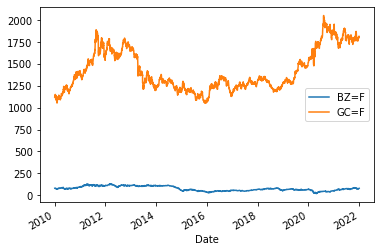

In [ ]:
activos = [ "BZ=F" ,"GC=F"]
precios = yf.download(activos,start="2010-01-01",end="2021-12-31")
precios = precios.loc[:,"Adj Close"]
precios.plot()

[*********************100%***********************]  1 of 1 completed


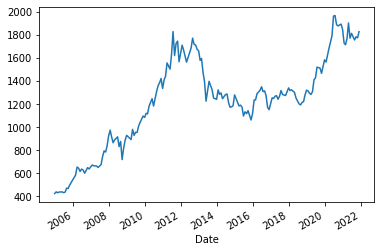

In [ ]:
gold = yf.download("GC=F",start="2005-01-01",end="2021-12-31",interval="1Mo")
gold = gold.loc[:,("Close")].dropna()
gold.plot()

[*********************100%***********************]  1 of 1 completed


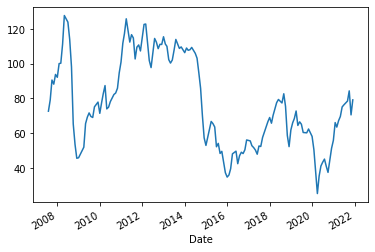

In [ ]:
brent = yf.download("BZ=F",start="2005-01-01",end="2021-12-31",interval="1Mo")
brent = brent.loc[:,("Close")].dropna()
brent.plot()

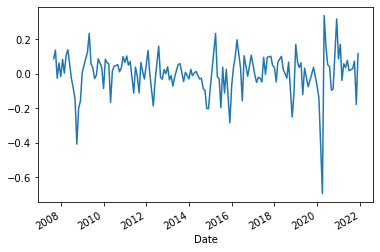

In [ ]:
#Retornos BRENT
retornosbrent=np.log(brent/brent.shift()).dropna()
retornosbrent.plot();

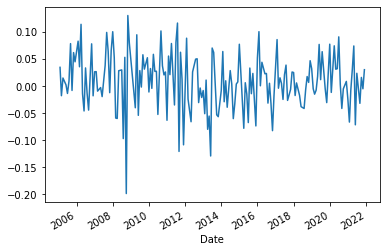

In [ ]:
#Retornos GOLD
retornosgold=np.log(gold/gold.shift()).dropna()
retornosgold.plot();

b. Presente los resultados de las pruebas de estacionariedad de Dickey-Fuller (ADF)

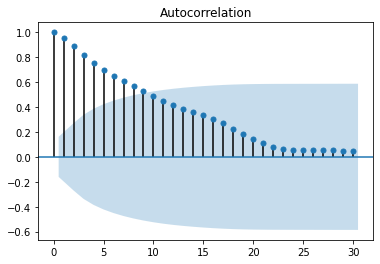

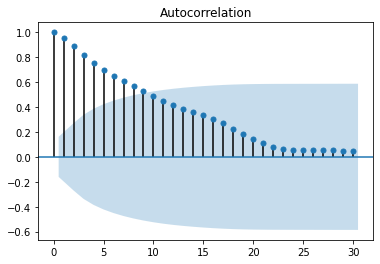

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(brent, lags=30)

In [ ]:
pruebagold = adfuller(gold)
print('ADF Statistic: %f' % pruebagold[0])
print('p-value: %f' % pruebagold[1])
print('Critical Values:')
for key, value in pruebagold[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -1.400814
p-value: 0.581886
Critical Values:
	1%: -3.46895
	5%: -2.87850
	10%: -2.57581


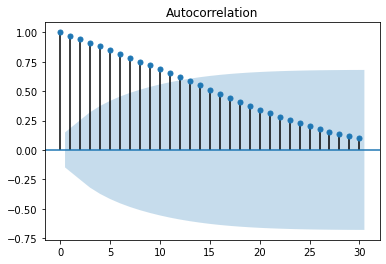

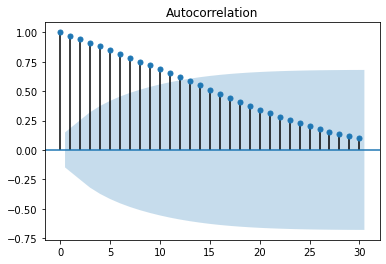

In [ ]:
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(gold, lags=30)

In [ ]:
pruebabrent= adfuller(brent)
# Para ajustar la salida de resultados
print('ADF Statistic: %f' % pruebabrent[0])
print('p-value: %f' % pruebabrent[1])
print('Critical Values:')
for key, value in pruebabrent[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -2.342987
p-value: 0.158478
Critical Values:
	1%: -3.47595
	5%: -2.88155
	10%: -2.57744


Ninguna de las dos series es no estcuioanria , debido a que el p valor es mayor a la significancia del 0.05

c. Construya 100 trayectorias o simulaciones para cada activo con periodicidad mensual y
con duración T=1.

In [ ]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    z = np.random.normal(0.0,1.0,[NS,M])
    s = np.zeros([NS, M+1])
    s[:,0] = S0
    dt = T / M
    for t in range(0,M):
        s[:,t+1] = s[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *z[:,t])
    st = s  
    return st



In [ ]:
#Estimacion de parametros GOLD
mug=retornosgold.mean()
sigamg=retornosgold.std()

datos_d = pd.DataFrame (gold)

T = 1
mu = mug
sigma = sigamg
S0 = datos_d.iloc[-1,:]
NS = 100
M = 252
st = PathsGBM(S0,mu,sigma,T,NS,M)
st

array([[1827.5       , 1828.06223651, 1830.70117008, ..., 1805.85557947,
        1806.92910029, 1808.51161949],
       [1827.5       , 1827.41827057, 1831.5345191 , ..., 1705.15531731,
        1704.92492146, 1708.46176814],
       [1827.5       , 1824.04480968, 1821.71640354, ..., 1884.50748866,
        1871.40918137, 1874.7444052 ],
       ...,
       [1827.5       , 1833.42617149, 1825.74562083, ..., 1763.76930194,
        1761.53450609, 1764.08587223],
       [1827.5       , 1822.61913484, 1823.1925243 , ..., 1656.58052537,
        1653.72724416, 1656.01991693],
       [1827.5       , 1834.62980004, 1832.42419326, ..., 1987.91482831,
        1984.42252281, 1980.13545691]])

Text(0, 0.5, 'S(t)')

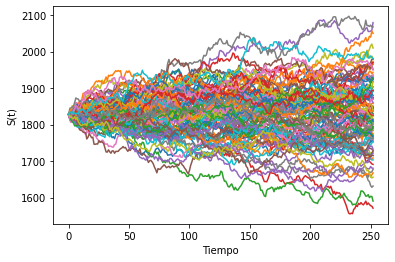

In [ ]:
plt.plot(np.transpose(st)) 
plt.xlabel("Tiempo")
plt.ylabel("S(t)")

In [ ]:
#Estimacion de parametros BRENT
mub=retornosbrent.mean()
sigab=retornosbrent.std()

datos_d1 = pd.DataFrame (brent)

T = 1
mu = mub
sigma = sigab
S0 = datos_d1.iloc[-1,:]
NS = 100
M = 252
st1 = PathsGBM(S0,mu,sigma,T,NS,M)
st1

array([[79.19999695, 79.47462409, 78.58111383, ..., 79.5880977 ,
        79.83125878, 79.73354394],
       [79.19999695, 80.51399867, 80.02707924, ..., 79.9986482 ,
        80.7528833 , 80.24768644],
       [79.19999695, 80.35723881, 79.95028607, ..., 68.69868049,
        68.70052575, 67.59260312],
       ...,
       [79.19999695, 79.58530783, 79.06059555, ..., 72.30633115,
        72.55416846, 73.51724081],
       [79.19999695, 80.00434846, 79.77457747, ..., 71.38426821,
        71.40569735, 70.7966169 ],
       [79.19999695, 80.41189448, 80.4946581 , ..., 71.07951246,
        71.31767171, 71.57800975]])

Text(0, 0.5, 'S(t)1')

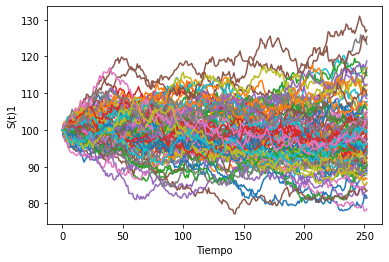

In [ ]:
plt.plot(np.transpose(st1)) 
plt.xlabel("Tiempo")
plt.ylabel("S(t)1")